## OpenCV - д дүрсийн боловсруулалт хийх

Уг дасгалыг дагаж хийхийг хүсвэл юун түрүүнд Ipython буюу Jupyter өөрийн үйлдлийн системд суулгасан байх шаардлагатай ба суулгах зааврыг [Ipython, notebook](http://jupyter.readthedocs.org/en/latest/install.html) дарж харна уу.

Дүрсийн боловсруулалтыг хийж эхлэхээс өмнө бид нар хэрэгцээтэй library - уудыг update хийх шаардлагатай.
Үүний тулд дараах командыг shell бичиж ажиллуулна. 
```
sudo apt-get update
sudo apt-get upgrade
```
Үүний дараа бид python програмыг ажиллуулна. shell - д дараах командыг бичнэ.
```
python
```
###  Хэрэгцээт Library дуудаж оруулна.

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

### Боловсруулах зургыг дуудах

In [2]:
image = cv2.imread("./images/Nani.png")

### Зургыг дүрслэх
Notebook -д OpenCV нь одоогоор зураг хэвлэхэд зарим нэгэн бэрхшээл байгаа бөгөөд үүнийг бид Matplotlib ашиглан дүрслэв. OpenCV ашиглаж байгаа тохиолдолд дараах камандыг бичиж болно.
```python
import cv2
img = cv2.imread('Nani.jpg')
cv2.imshow('Nani',img)
cv2.waitKey(0)
cv2.destroyAllWindows() 
```


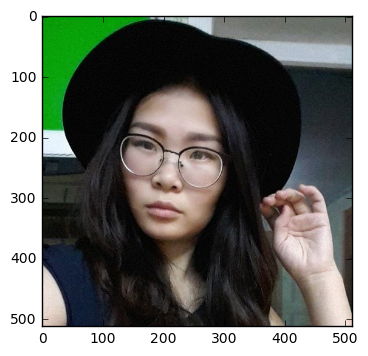

In [3]:
Nani = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(Nani)
plt.show()

* Matplotlib-ээр зургыг BGR format-аар уншдаг учир өнгийг хөрвүүлэх шаардлагатай.

### Зургыг хар цагаан болгох

In [4]:
print Nani[300,250,:]

[203 173 160]


Зургын [pixel](https://en.wikipedia.org/wiki/Pixel) гэдэг тухайн зургын элемэнт гэх буюу зургын байрлал дахь өнгийн комбинаци юм. Жишээ нь: [217 198 194]

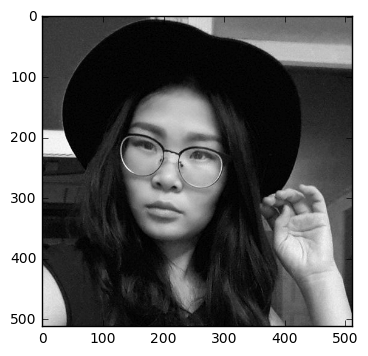

177


In [5]:
gray_Nani=(Nani[:,:,0]/3+Nani[:,:,1]/3+Nani[:,:,2]/3)
Nani = np.array(gray_Nani, dtype=np.uint8)
plt.imshow(Nani,cmap = plt.get_cmap('gray'))
plt.show()
print Nani[300,250]

### Зургыг эргүүлэх

Үүний тулд бид эхлээд numpy library-г python-д суулгасан байх шаардлагатай.

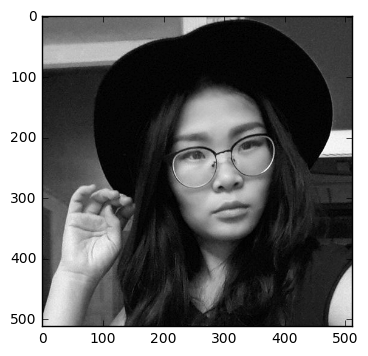

In [6]:
Left_Nani = Nani[:,::-1]
plt.imshow(Left_Nani,cmap = plt.get_cmap('gray'))
plt.show()

###Зургын хэмжээг өөрчлөх

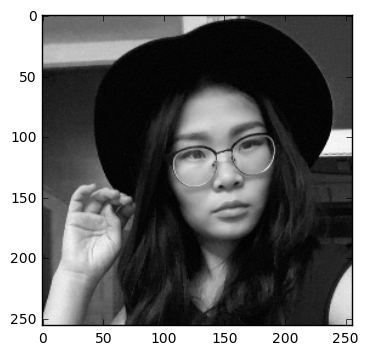

In [7]:
Resize_Nani=Left_Nani[::2,::2]
plt.imshow(Resize_Nani,cmap = plt.get_cmap('gray'))
plt.show()

###Matplotlib Subplot ашиглах

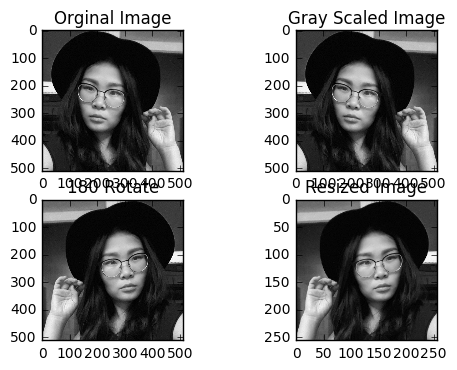

In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Nani = cv2.imread("./images/Nani.png")


gray_Nani=Nani[:,:,0]/3.0+Nani[:,:,1]/3.0+Nani[:,:,2]/3.0

Nani = np.array(gray_Nani, dtype=np.uint8)

Left_Nani = Nani[:,::-1]

Resize_Nani=Left_Nani[::2,::2]

images=[Nani, gray_Nani, Left_Nani, Resize_Nani]

titles=['Orginal Image','Gray Scaled Image','180 Rotate','Resized Image']

for i in xrange(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],cmap = plt.get_cmap('gray'))
    plt.title(titles[i])
    
plt.show()

### Дүрс зурах

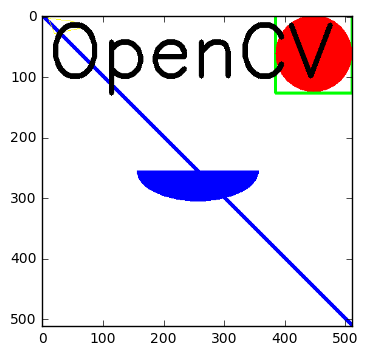

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 

# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Fill the Image white
img.fill(255)
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)

cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

cv2.circle(img,(447,63), 63, (0,0,255), -1)

cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,100), font, 4,(0,0,0),8)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [10]:
import cv2
events = [i for i in dir(cv2) if 'EVENT' in i]
print events

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


### Adaptive Thresholding

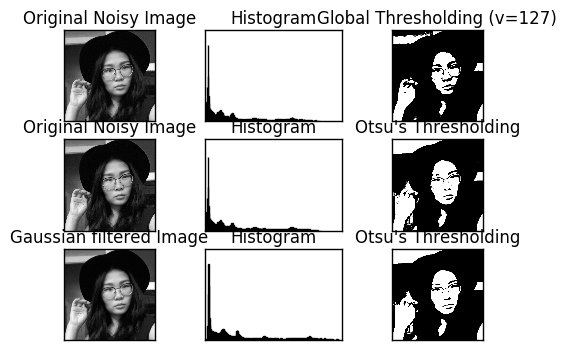

In [11]:
# global thresholding
ret1,th1 = cv2.threshold(Left_Nani,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(Left_Nani,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(Left_Nani,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [Resize_Nani, 0, th1, Left_Nani, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
           'Original Noisy Image','Histogram',"Otsu's Thresholding",
           'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
 
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

[255 255 255]


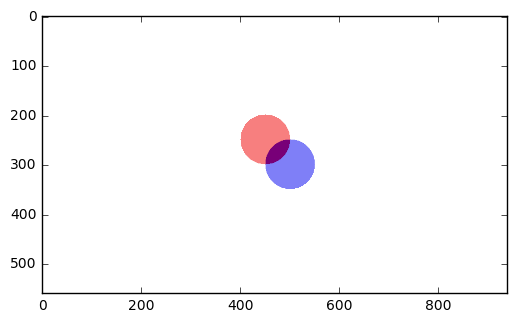

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
blank_image=np.ones((560,940,3), np.uint8)
blank_image.fill(255)

blank_image1=np.ones((560,940,3), np.uint8)
blank_image1.fill(255)

cv2.circle(blank_image,(450,250),50,(0,0,240),-1)

cv2.circle(blank_image1,(500,300),50,(240,0,0),-1)

a = blank_image
b = blank_image1

alpha=0.5
beta = ( 1.0 - alpha );

print blank_image[300,500,:]
dst = cv2.addWeighted(a,alpha,b,beta,0.3,0)

dst = alpha * a + beta * b;
alpha_blending= np.array(dst,dtype=np.uint8)
Alpha = cv2.cvtColor(alpha_blending, cv2.COLOR_BGR2RGB)
plt.imshow(Alpha)
plt.show()

### Зурагт тект оруулах

In [13]:
import cv2
import numpy as np

# mouse callback function
def draw_text(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        a = "Hello"
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,a,(x,y), font, 1,(255,255,255),1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_text)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()